In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

Step 1: Download the Data
You will use data by the Gapminder Foundation. Go to www.gapminder.org/data and download CSV files on:

life expectancy
fertility rate, total
population

Step 2
Load all three tables. Make sure the data is correct:

inspect the dimensions you should have 200+ rows and 60+ columns.
make sure the country names are in the row index
make sure the years are in the column index
use df.columns to check whether the column index consists of strings or integers (both are ok but you need to know)


In [97]:
### Task 1 Importing the data
df_pop = pd.read_csv('/Users/melvinrinkleff/dev/code/22_fall_data_science/code-lu-data-science/tasks/population_total.csv', index_col=0)
df_life_exp = pd.read_csv('/Users/melvinrinkleff/dev/code/22_fall_data_science/code-lu-data-science/tasks/life_expectancy_years.csv', index_col=0)
df_fert = pd.read_csv('/Users/melvinrinkleff/dev/code/22_fall_data_science/code-lu-data-science/tasks/children_per_woman_total_fertility.csv', index_col=0)

df_pop = df_pop.transpose()
df_life_exp = df_life_exp.transpose()
df_fert = df_fert.transpose()



Step 3
Choose fertility and life expectancy for the year 2015 and put them into a single table.

In [98]:
### Task 2: Fertility and life expectancy in 2015
df_fert_2015 = df_fert.loc['2015']
df_life_exp_2015 = df_life_exp.loc['2015']

### Task 2.1: Resetting Index
df_fert_2015 = df_fert_2015.reset_index()
df_life_exp_2015 = df_life_exp_2015.reset_index()

df_fert_2015.columns = ['country', 'fertility']
df_life_exp_2015.columns = ['country', 'life_exp']

### Task 2.2: Merging the data
df_fert_2015 = df_fert_2015.merge(df_life_exp_2015, on='country')
df_fert_2015 = df_fert_2015.set_index('country')

df_fert_2015


,fertility,life_exp
country,,
Afghanistan,4.80,61.9
Angola,5.77,63.5
Albania,1.71,78.1
United Arab Emirates,1.77,73.2
Argentina,2.31,76.5
...,...,...
Samoa,4.03,70.1
Yemen,4.10,68.2
South Africa,2.49,62.3


Step 4
Remove all rows with missing values.

In [99]:
### Task 4: Remove rows with missing values
df_pop = df_pop.dropna()
df_life_exp = df_life_exp.dropna()
df_fert = df_fert.dropna()


Step 5
Draw a scatterplot of fertility over life expectancy in 2015.

In [ ]:
###Task 5: Create a scatterplot of fertility over life expectancy in 2015
df_fert_2015.plot.scatter(x='fertility', y='life_exp', figsize=(10, 10), title='Fertility vs Life Expectancy in 2015')

Step 6
Repeat steps 3-5 for the year 1960. What differences do you observe?

Ideally, format the axes of both plots so that they are the same. This can be done (e.g. with plt.axes([left, bottom, width, height])).

In [ ]:
### Task 6: Create a scatterplot of fertility over life expectancy in 1960
df_fert_1960 = df_fert.loc['1960']
df_life_exp_1960 = df_life_exp.loc['1960']

### Task 6.1: Resetting Index
df_fert_1960 = df_fert_1960.reset_index()
df_life_exp_1960 = df_life_exp_1960.reset_index()

df_fert_1960.columns = ['country', 'fertility']
df_life_exp_1960.columns = ['country', 'life_exp']

### Task 6.2: Merging the data
df_fert_1960 = df_fert_1960.merge(df_life_exp_1960, on='country')
df_life_exp_1960 = df_life_exp_1960.set_index('country')

df_fert_1960.plot.scatter(x='fertility', y='life_exp', figsize=(10, 10), title='Fertility vs Life Expectancy in 1960')

Step 7
Write a function that allows you to draw a scatterplot for any given year.

In [ ]:
### Task 7: Function to create a scatterplot of fertility over life expectancy
def plot_fert_life_exp(year):
    df_fert_year = df_fert.loc[year]
    df_life_exp_year = df_life_exp.loc[year]
    
    ### Task 7.1: Resetting Index
    df_fert_year = df_fert_year.reset_index()
    df_life_exp_year = df_life_exp_year.reset_index()

    df_fert_year.columns = ['country', 'fertility']
    df_life_exp_year.columns = ['country', 'life_exp']

    ### Task 7.2: Merging the data
    df_fert_year = df_fert_year.merge(df_life_exp_year, on='country')
    df_life_exp_year = df_life_exp_year.set_index('country')

    return df_fert_year.plot.scatter(x='fertility', y='life_exp', figsize=(10, 10), title=f'Fertility vs Life Expectancy in {year}')

#testing for 1970
print(plot_fert_life_exp('1970'))

Step 8
Create one scatterplot for each year from 1960 to 2010 and write it to a file.

/Users/melvinrinkleff/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


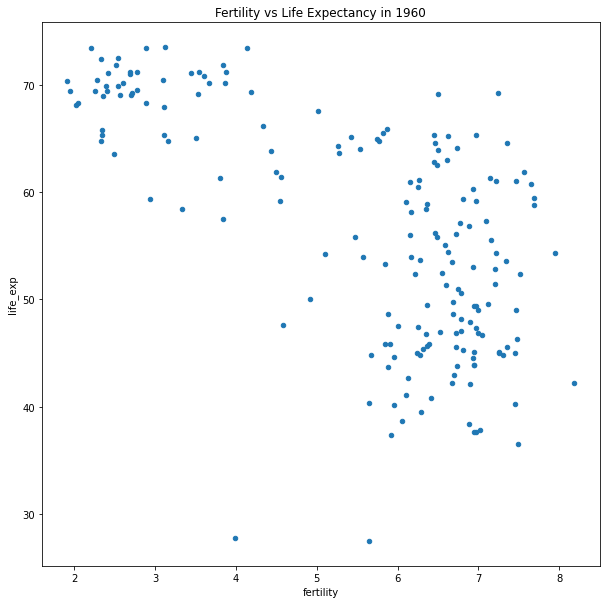

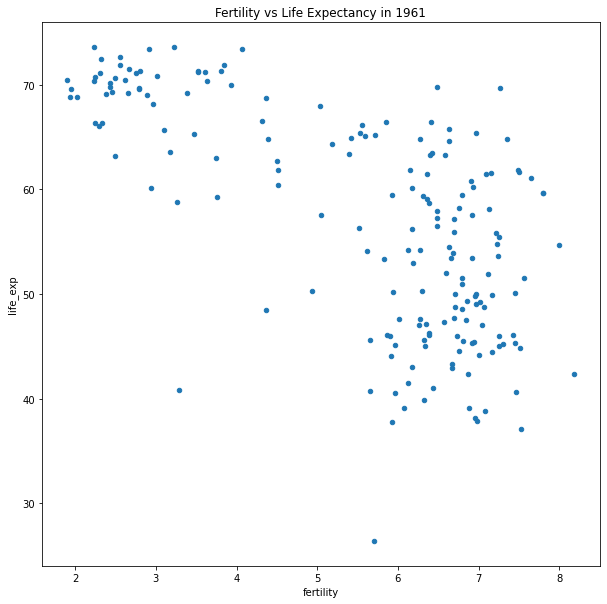

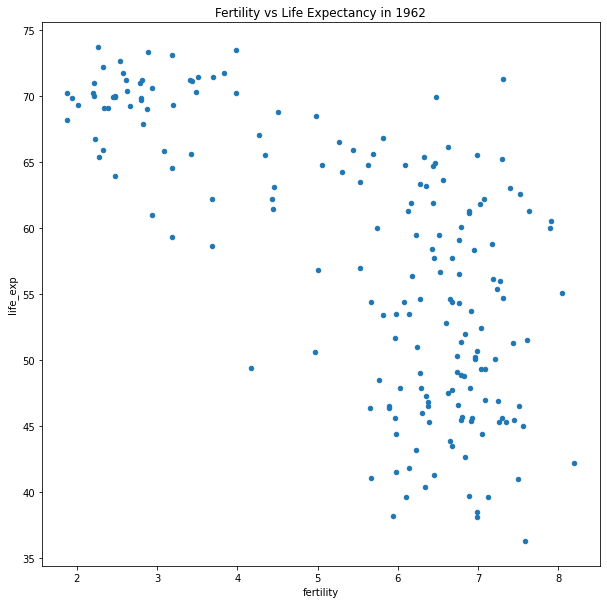

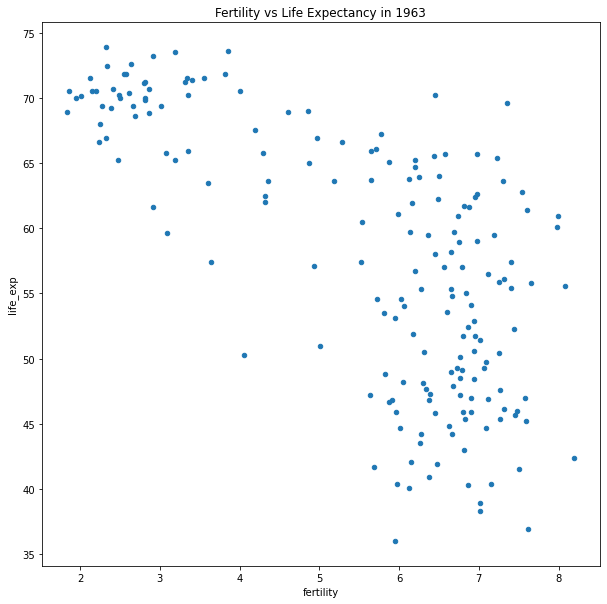

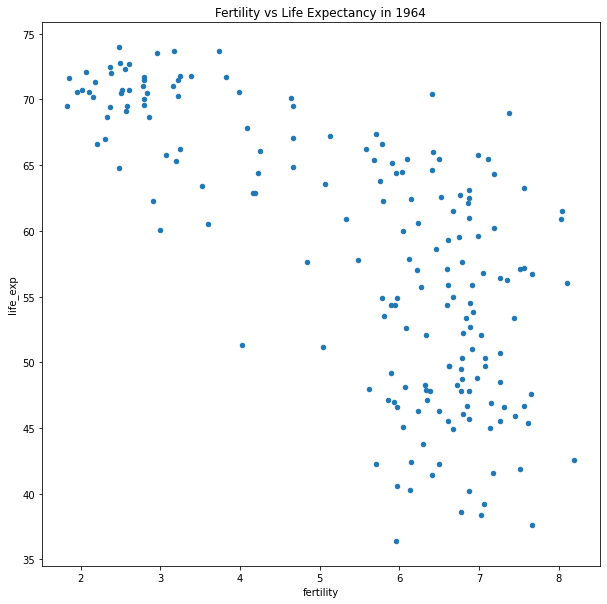

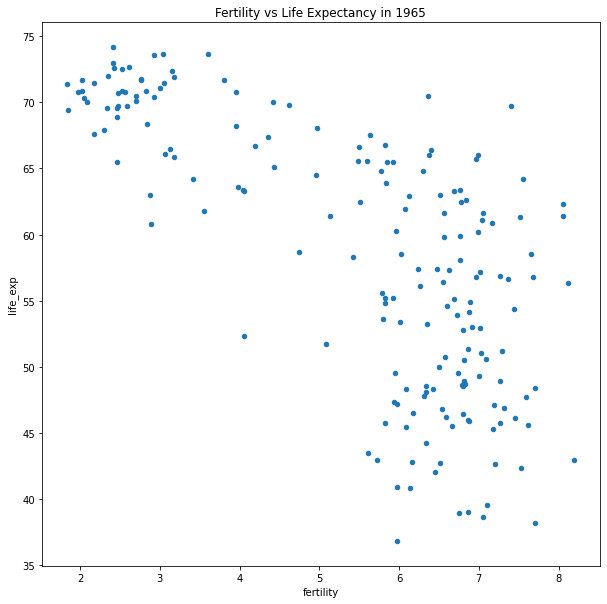

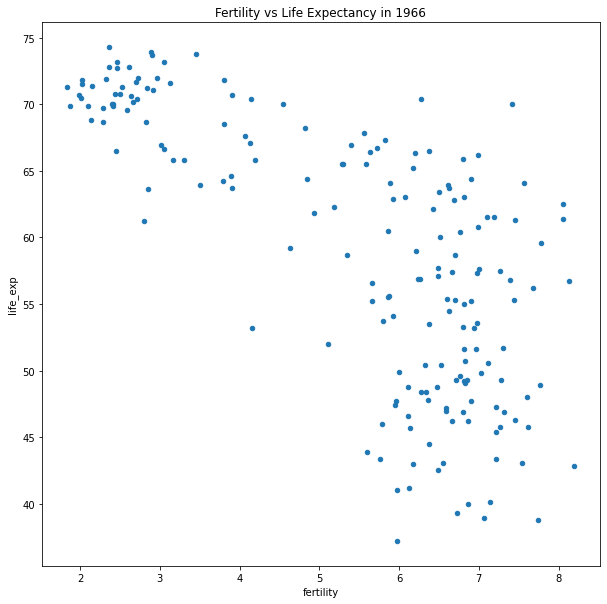

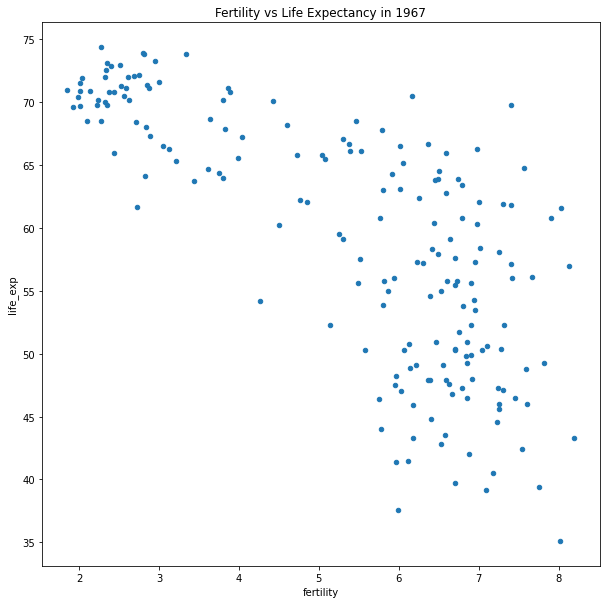

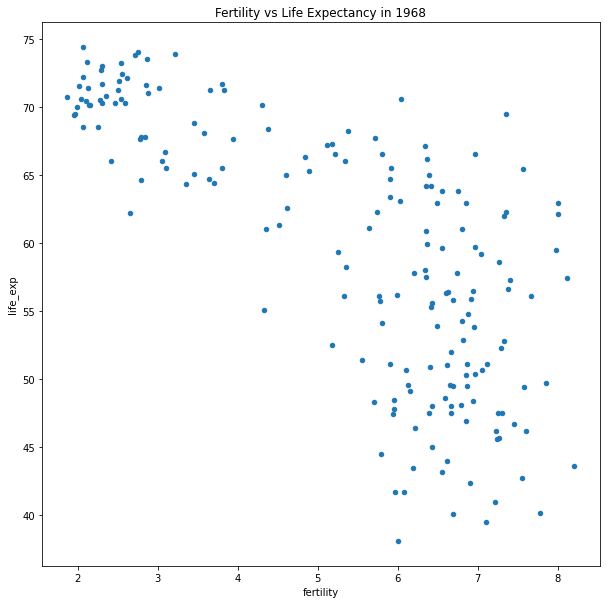

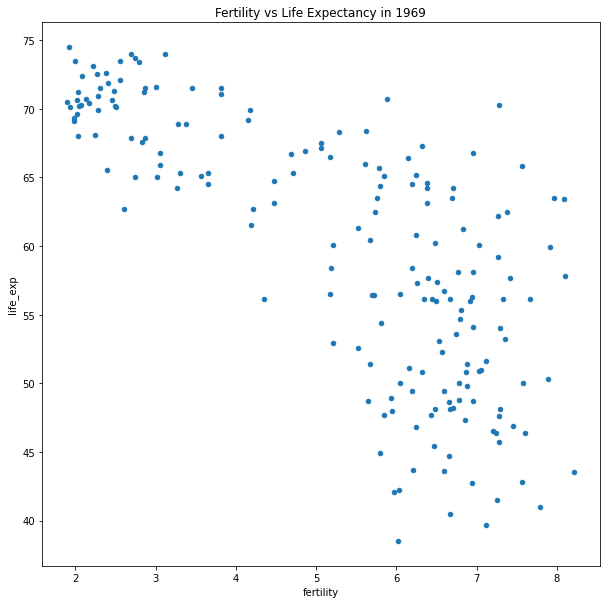

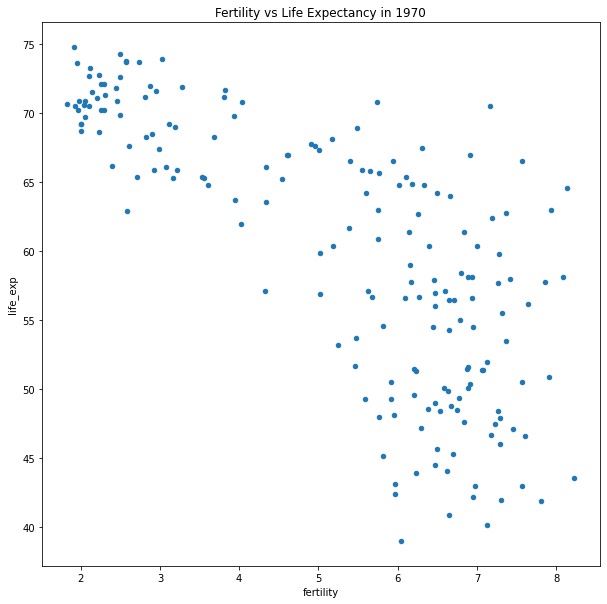

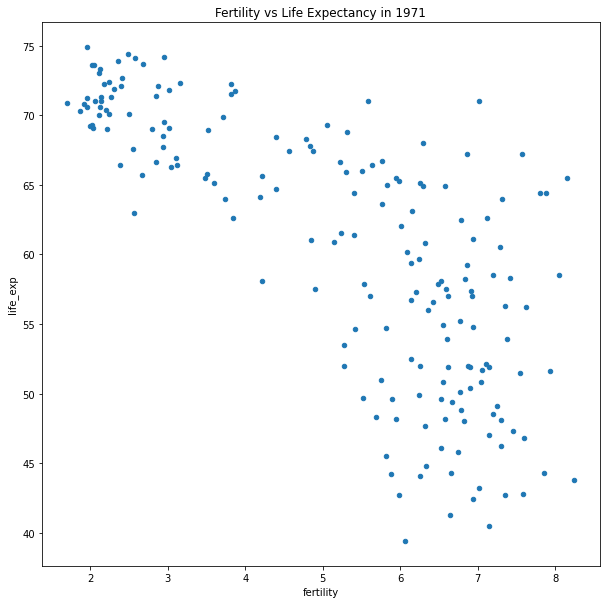

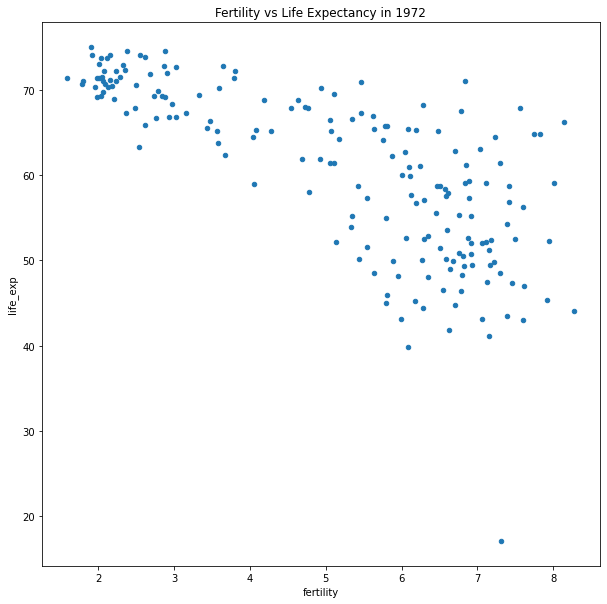

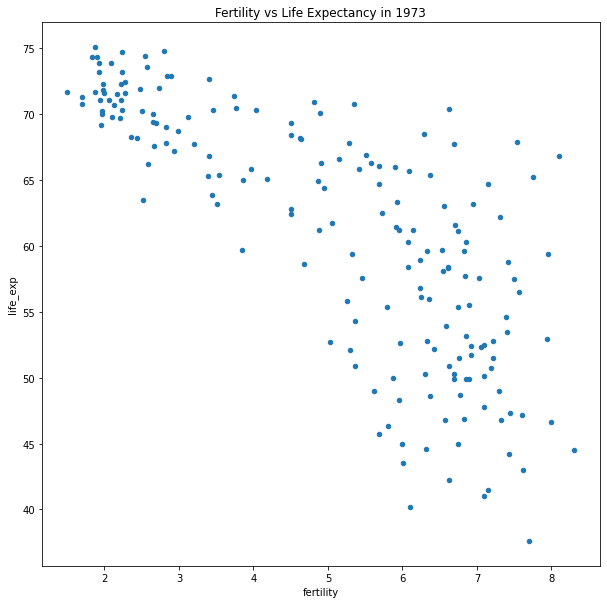

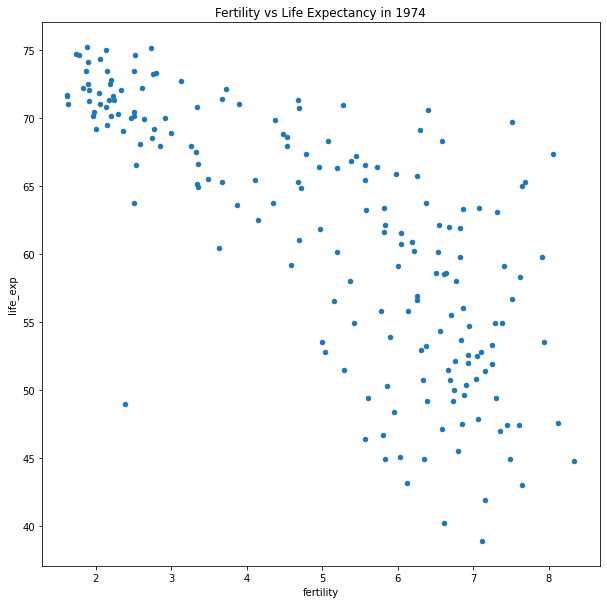

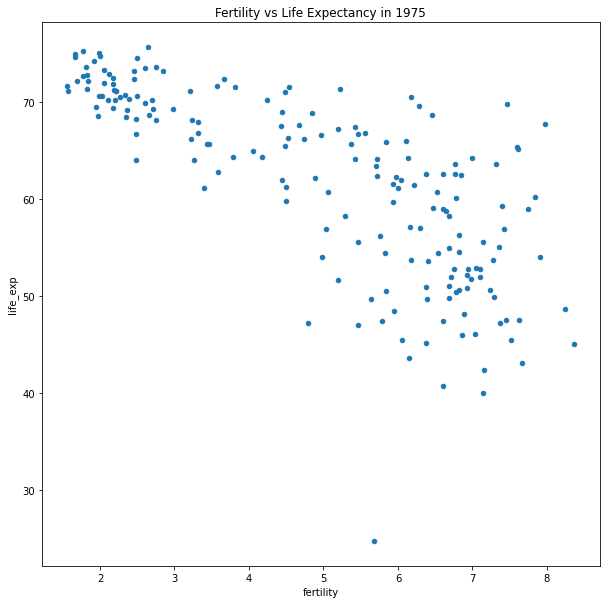

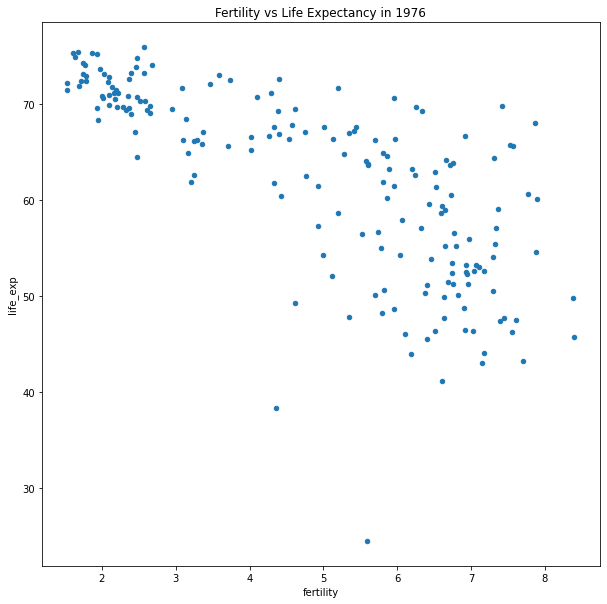

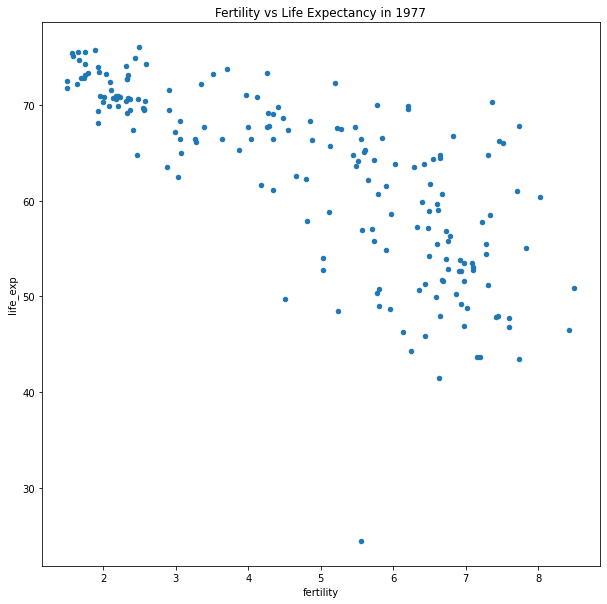

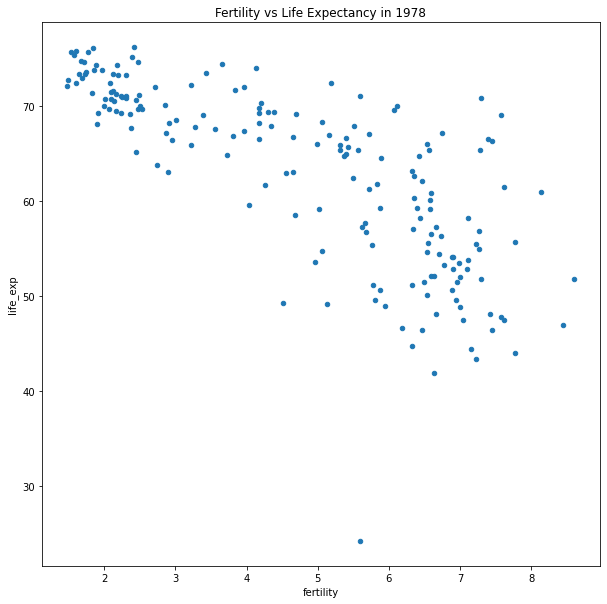

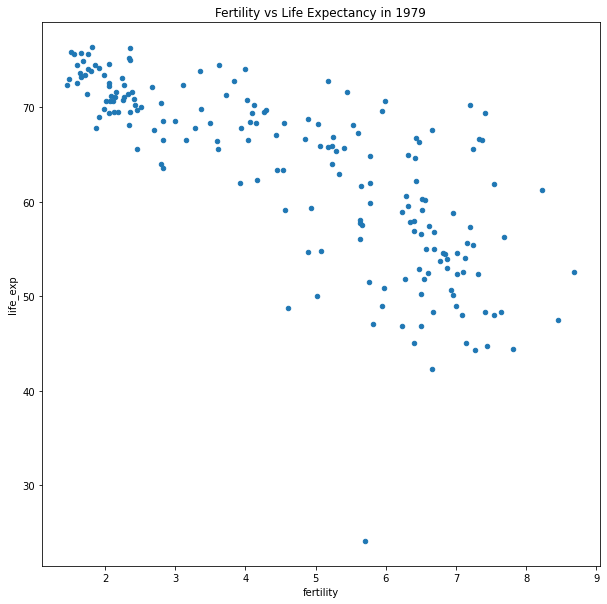

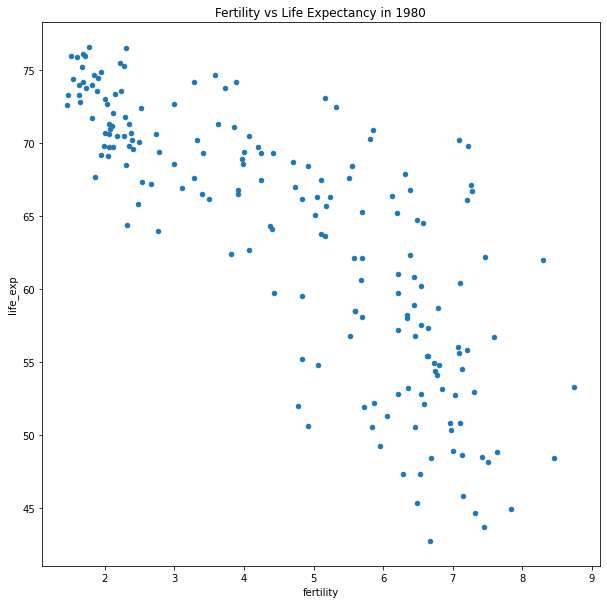

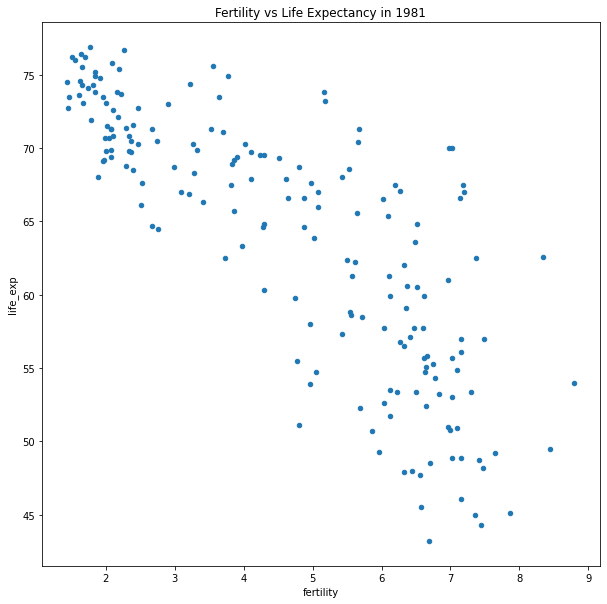

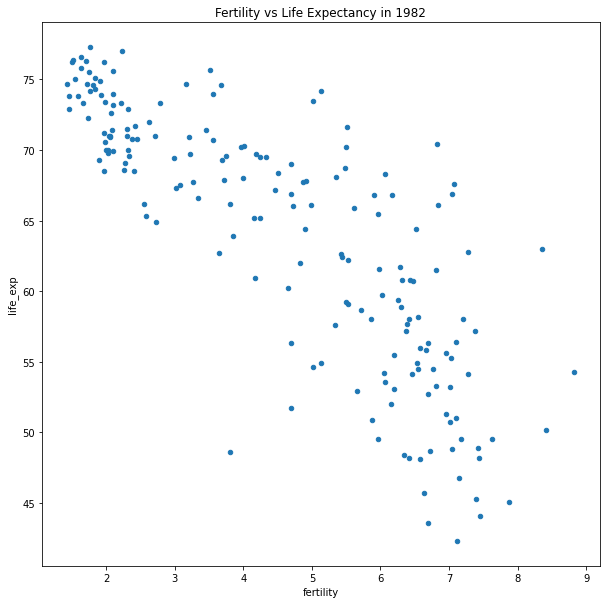

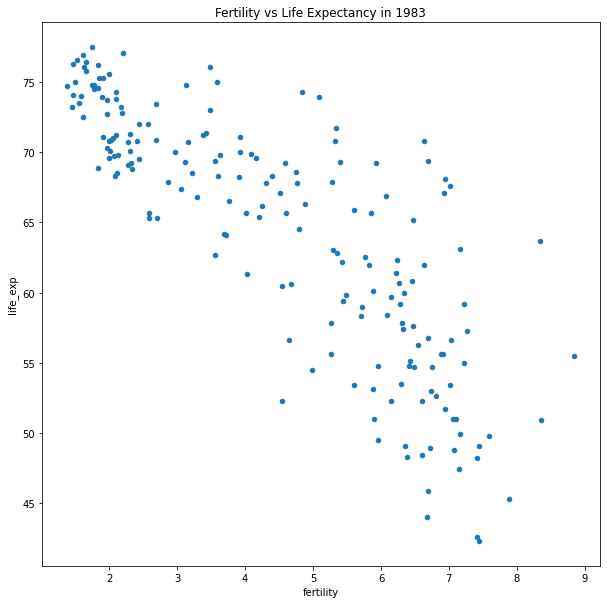

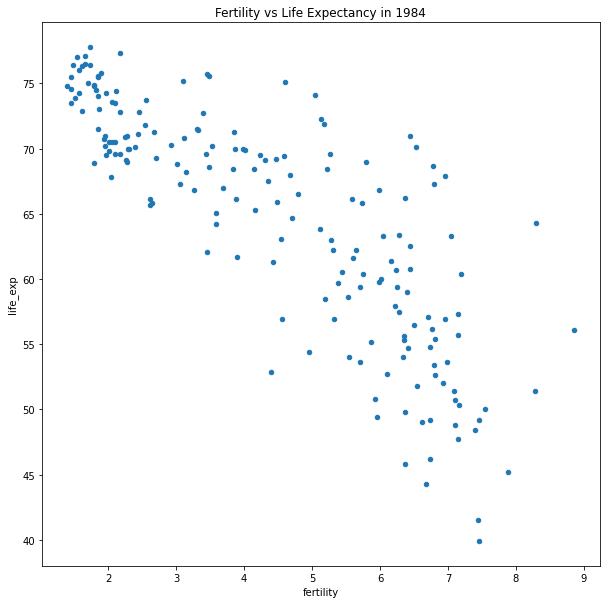

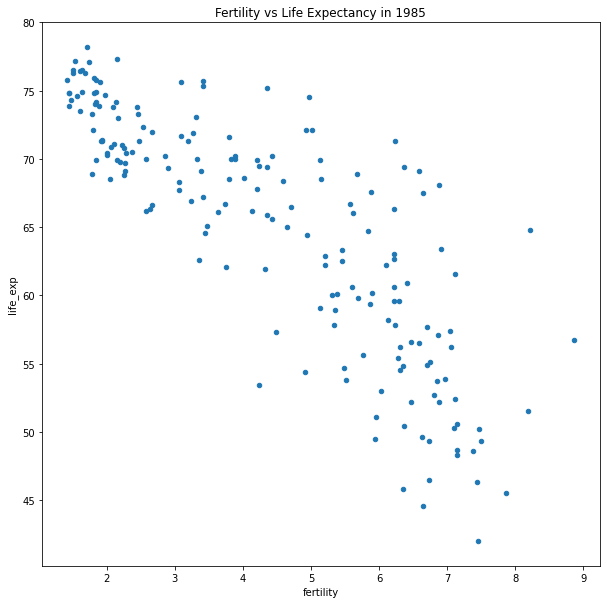

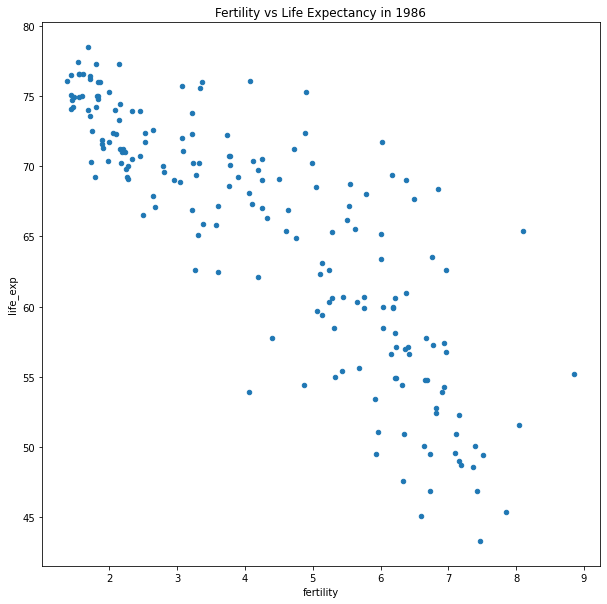

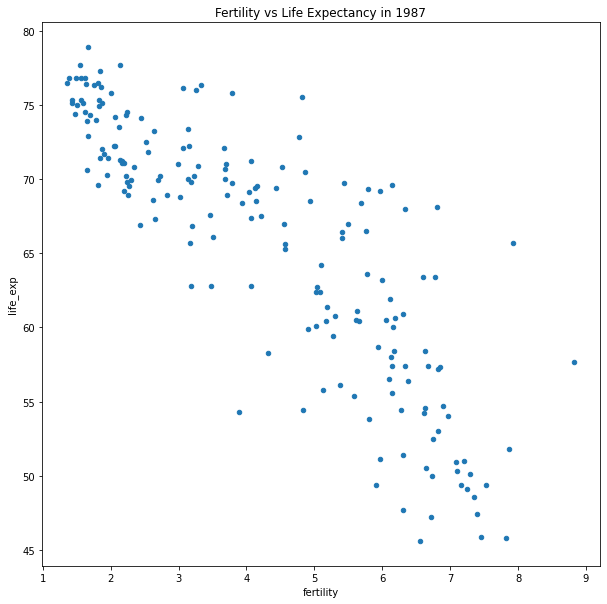

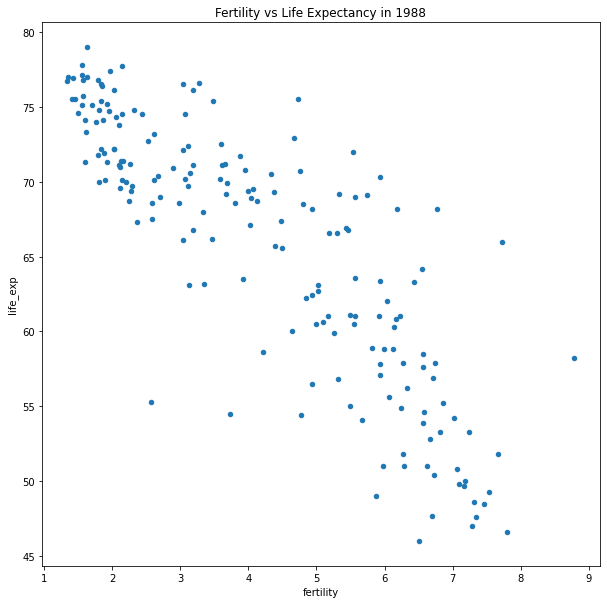

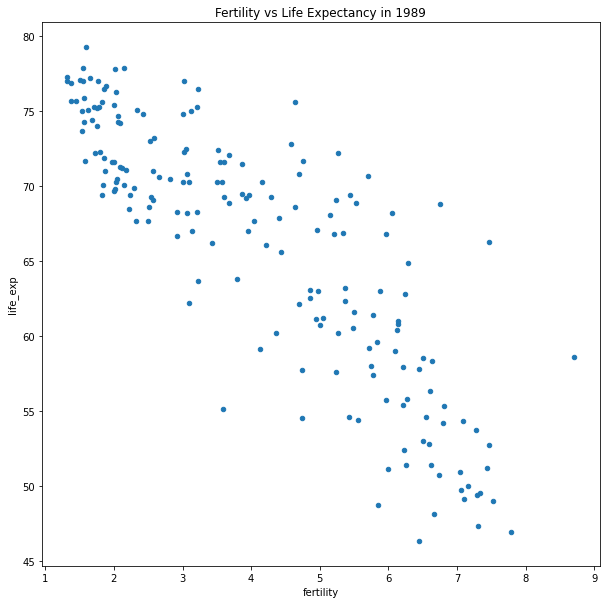

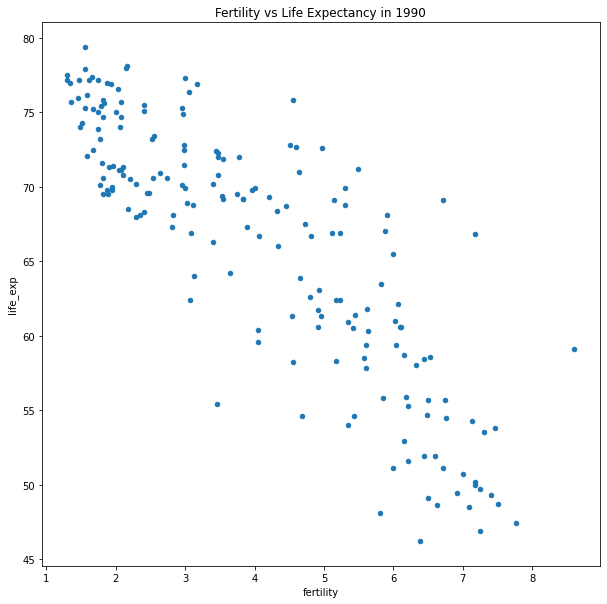

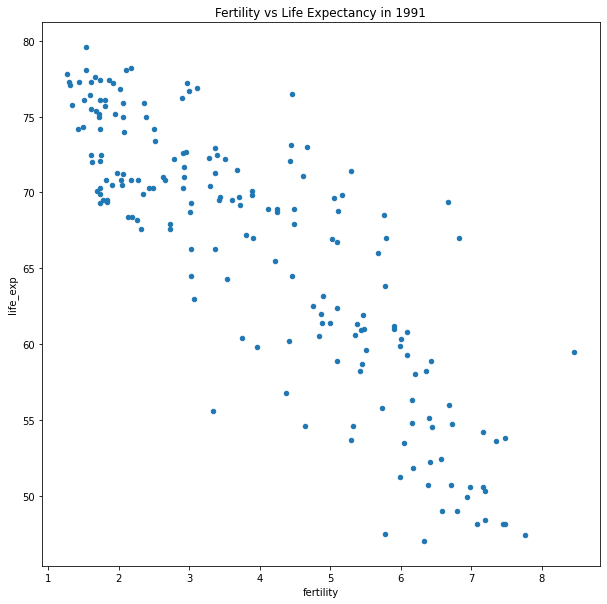

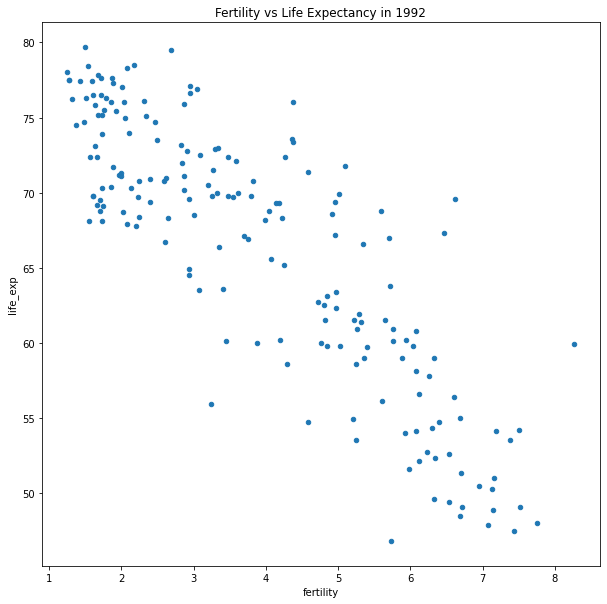

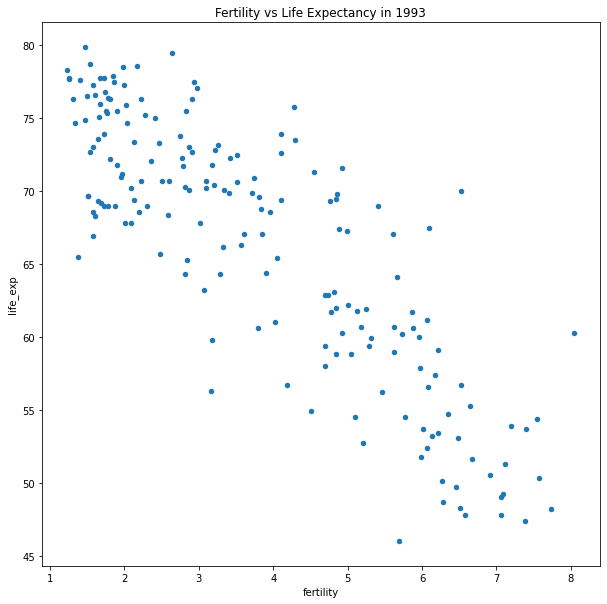

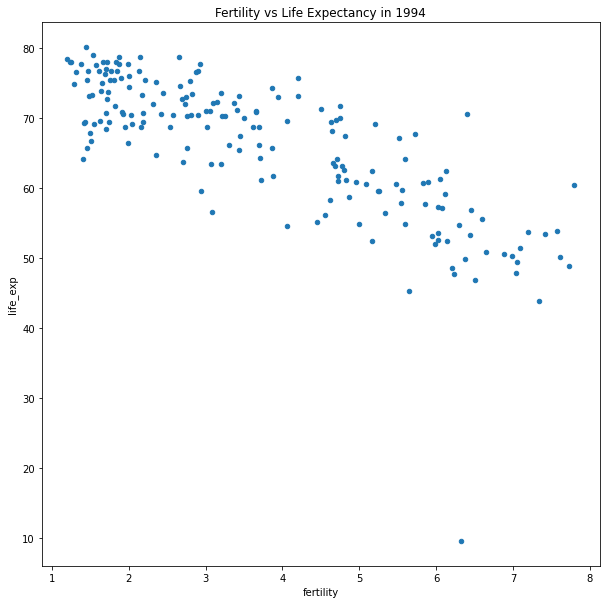

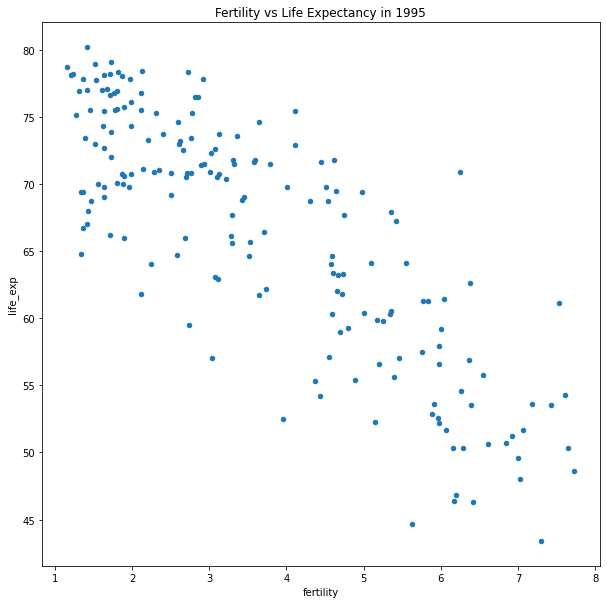

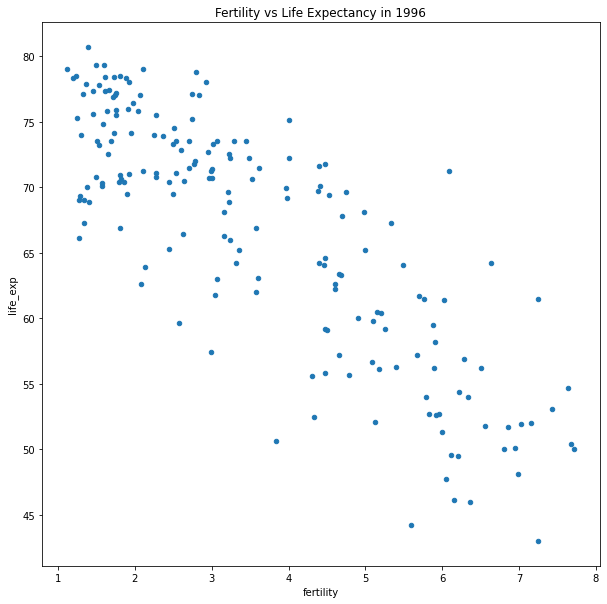

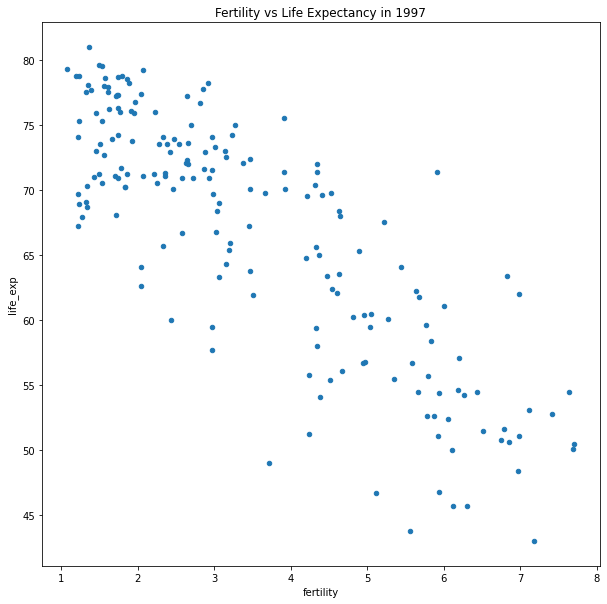

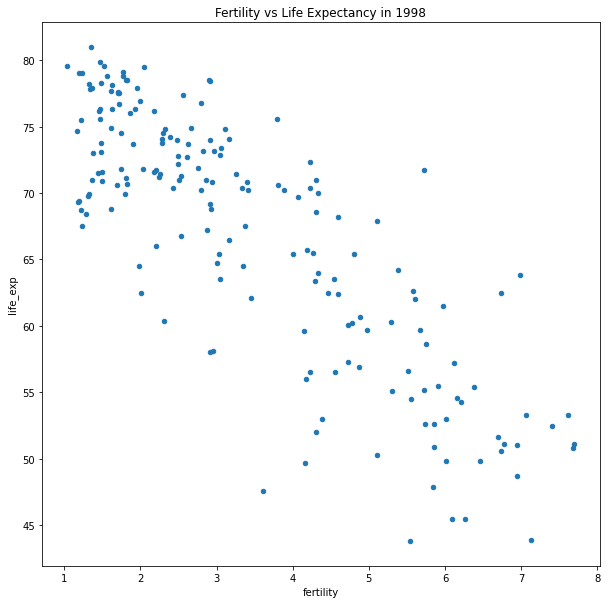

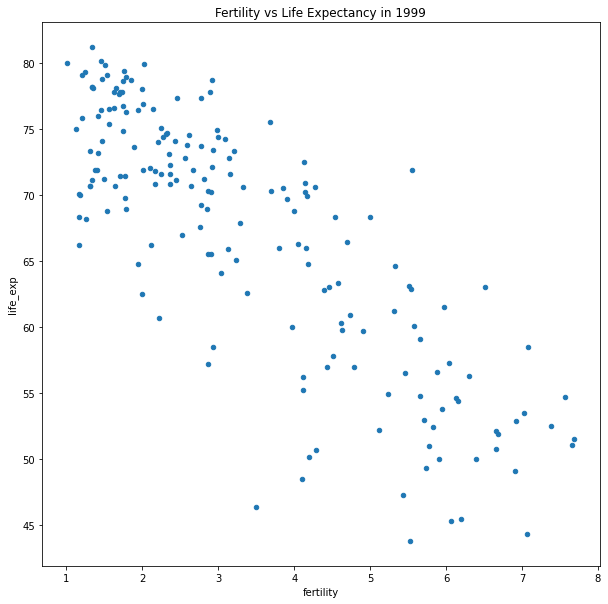

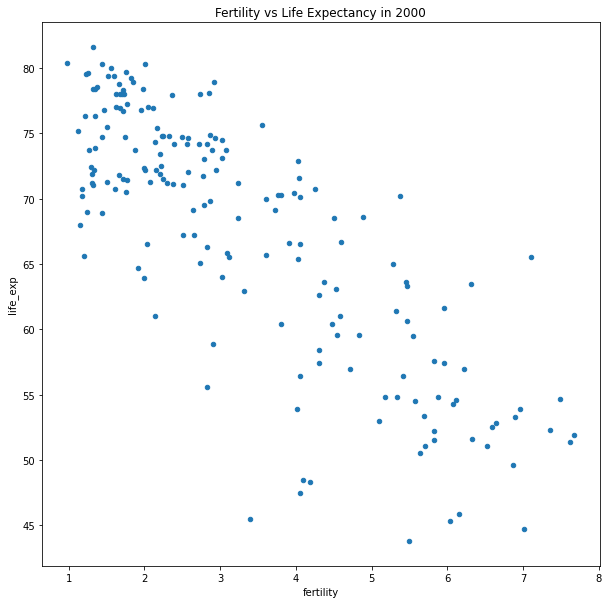

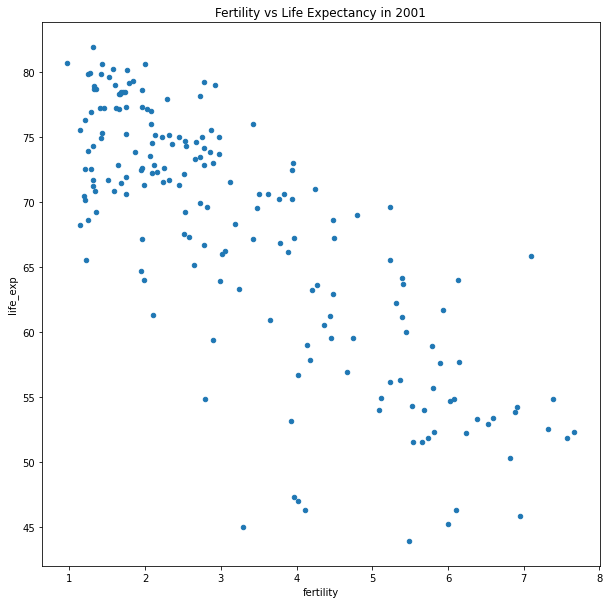

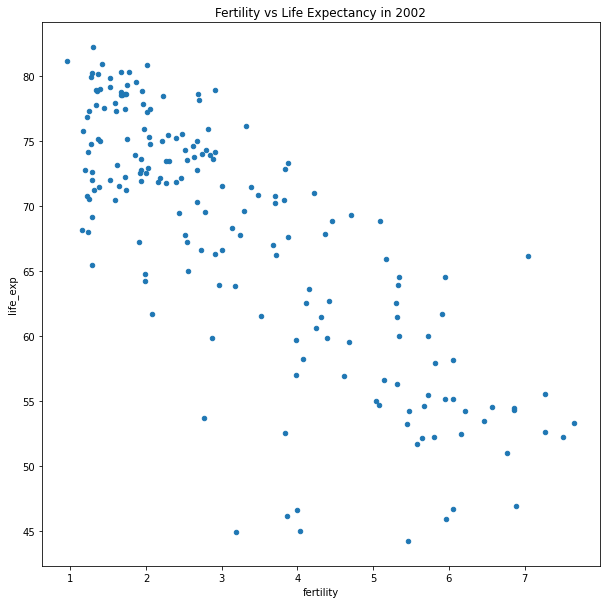

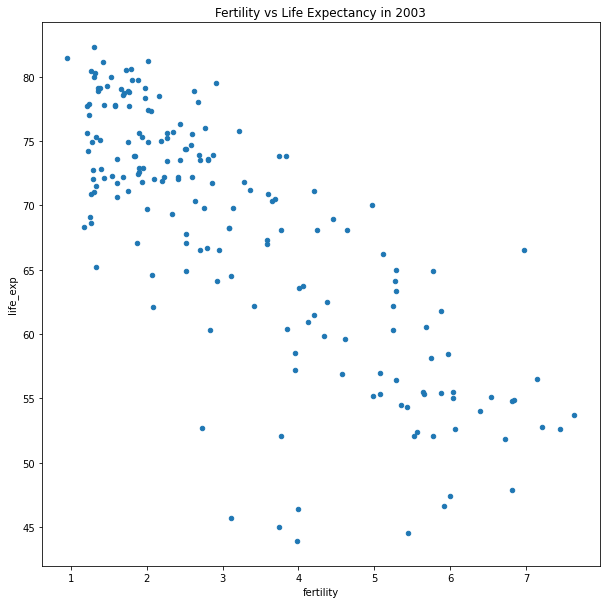

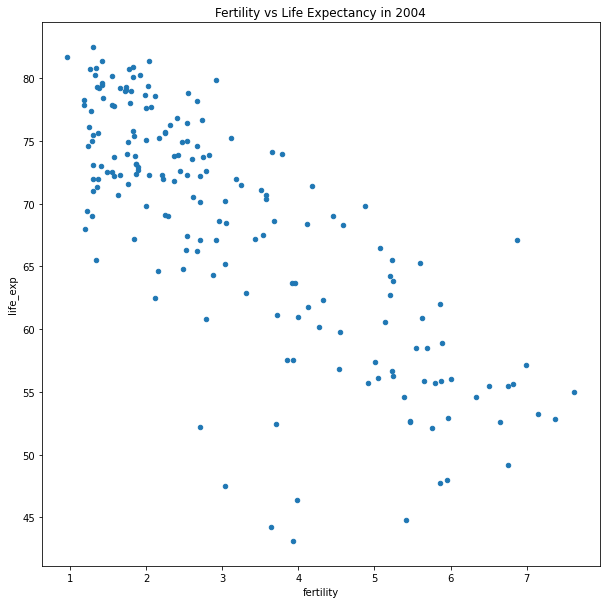

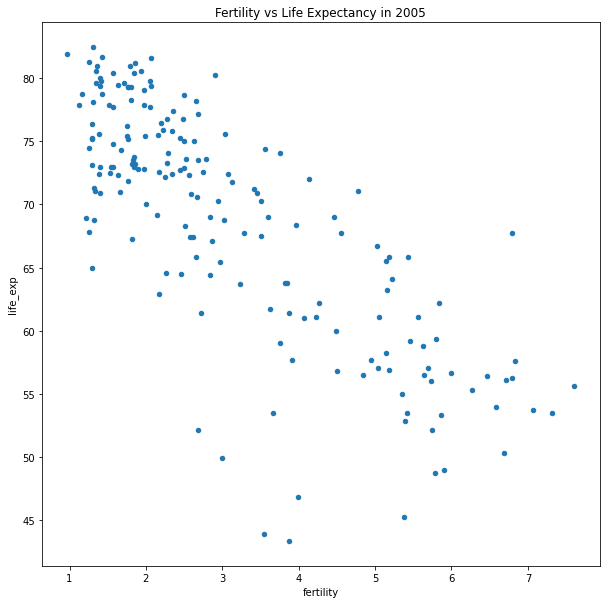

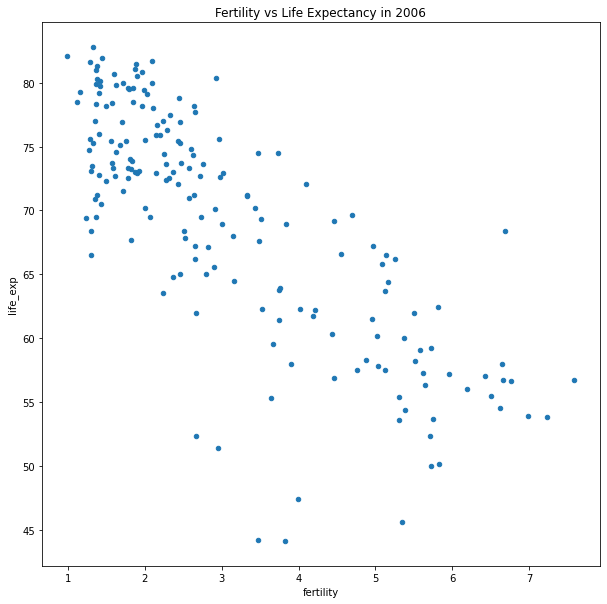

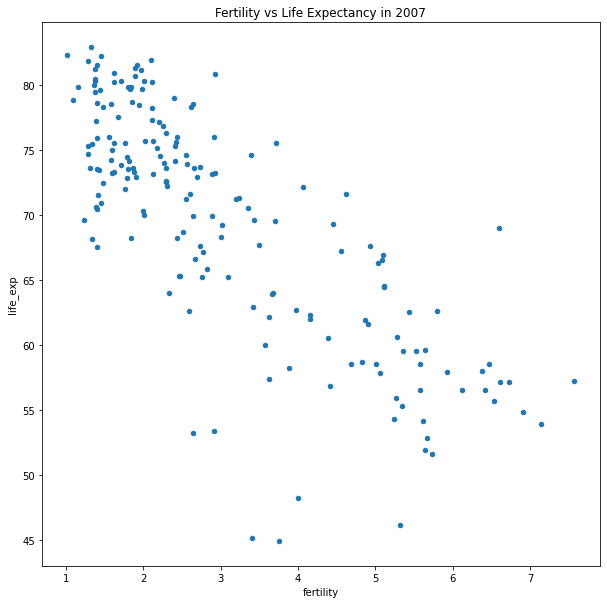

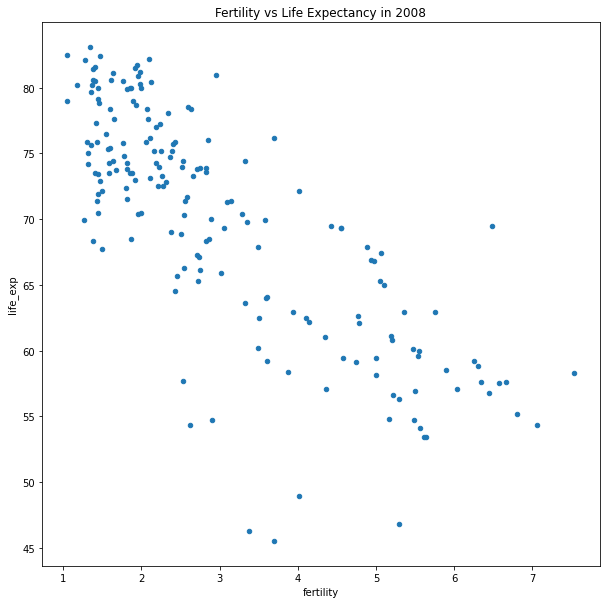

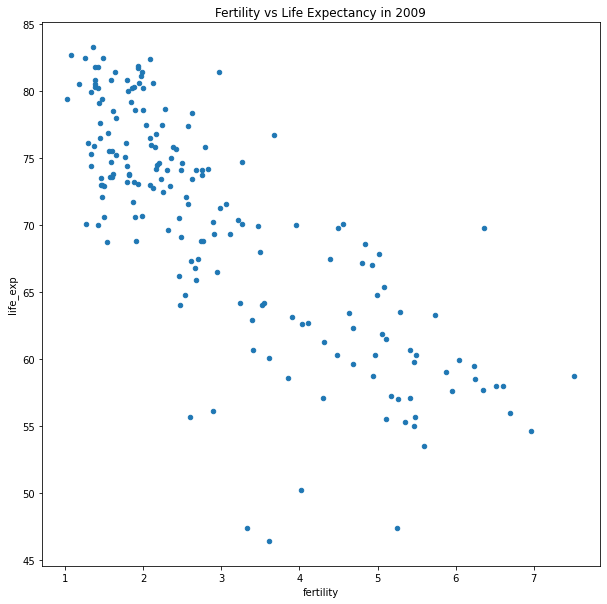

In [100]:
### Task 8: Scatterplot for each year from 1960 to 2010 and write it to a file
df_pop.index = df_pop.index.astype(int)
df_life_exp.index = df_life_exp.index.astype(int)
df_fert.index = df_fert.index.astype(int)

for year in range(1960, 2010):
    plt = plot_fert_life_exp(year).get_figure()
    plt.savefig(f'plots_fert_life_exp/fert_life_exp_{year}.png')



Step 9
Connect the scatterplots to an animation.

You can use the imageio module. Install it with:

pip install imageio
Then adapt and run the code:


import imageio
plots = [
    imageio.imread(f'myplot_{year}.png'))
    for year in range(___, ___)
]

imageio.mimsave('animation.gif', plots, fps=20)

In [80]:
import imageio

In [86]:
### Task 9: Create a gif of the scatterplots
plots = [
    imageio.imread(f'plots_fert_life_exp/fert_life_exp_{year}.png')
    for year in range(1960, 2010)
]

imageio.mimsave('plot_animated/animation.gif', plots, fps=10)

Step 10
Also read the population file. Because the population is written like 500k or 20M, you need a conversion function that converts a single value:

def pop_convert(x):
    if pop.endswith('k'):
        return int(pop[:-1]) * 100_000
    ...
Use the df.apply() function to convert the entire DataFrame or a single column:

df.apply(pop_convert)

In [103]:
df_pop

country,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1800,3.28M,1.57M,400k,2650,40.2k,534k,413k,37k,200k,3M,...,1.92M,25.8k,1M,4M,27.8k,47.3k,2.59M,1.45M,747k,1.09M
1801,3.28M,1.57M,402k,2650,40.2k,520k,413k,37k,205k,3.02M,...,1.92M,25.8k,978k,4.1M,27.8k,47.3k,2.59M,1.45M,758k,1.09M
1802,3.28M,1.57M,404k,2650,40.2k,506k,413k,37k,211k,3.04M,...,1.92M,25.8k,957k,4.2M,27.8k,47.3k,2.59M,1.46M,770k,1.09M
1803,3.28M,1.57M,405k,2650,40.2k,492k,413k,37k,216k,3.05M,...,1.92M,25.8k,936k,4.31M,27.8k,47.3k,2.59M,1.46M,782k,1.09M
1804,3.28M,1.57M,407k,2650,40.2k,479k,413k,37k,222k,3.07M,...,1.92M,25.8k,916k,4.41M,27.8k,47.3k,2.59M,1.47M,794k,1.09M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,75.8M,179M,1.19M,62.7k,12.7M,57.2M,2.1M,103k,42.1M,8.66M,...,42.7M,77.7k,34.8M,98.8M,942k,313k,53.8M,79.5M,78.4M,30.9M
2097,75.6M,182M,1.17M,62.6k,12.7M,57.1M,2.09M,103k,42.3M,8.66M,...,42.6M,76.9k,34.7M,98.4M,949k,312k,53.7M,79.5M,79.2M,31M
2098,75.4M,184M,1.14M,62.5k,12.8M,57M,2.07M,103k,42.5M,8.67M,...,42.5M,76.1k,34.5M,98.1M,955k,312k,53.5M,79.4M,80M,31M
2099,75.2M,186M,1.11M,62.5k,12.8M,56.9M,2.05M,102k,42.7M,8.67M,...,42.4M,75.4k,34.4M,97.8M,962k,311k,53.4M,79.3M,80.8M,31M


In [105]:
df_pop_conv = pd.DataFrame()

### Task 10: Conversion function for the population data
def convert_pop(pop):
    if pop.endswith('k'):
        return int(float(pop[:-1]) * 100_000)
    elif pop.endswith('M'):
        return int(float(pop[:-1]) * 1_000_000)
    elif pop.endswith('B'):
        return int(float(pop[:-1]) * 1_000_000_000)
    else:
        return int(float(pop))

for column in df_pop.columns:
    if column == 'country':
        df_pop_conv[column] = df_pop[column]
    else:
        df_pop_conv[column] = df_pop[column].apply(convert_pop)

df_pop_conv
        

/var/folders/mt/c0xfkg7j1rl77dtg76qt7vnc0000gn/T/ipykernel_71602/528765103.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pop_conv[column] = df_pop[column].apply(convert_pop)
/var/folders/mt/c0xfkg7j1rl77dtg76qt7vnc0000gn/T/ipykernel_71602/528765103.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pop_conv[column] = df_pop[column].apply(convert_pop)
/var/folders/mt/c0xfkg7j1rl77dtg76qt7vnc0000gn/T/ipykernel_71602/528765103.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1800,3280000,1570000,40000000,2650,4020000,53400000,41300000,3700000,20000000,3000000,...,1920000,2580000,1000000,4000000,2780000,4730000,2590000,1450000,74700000,1090000
1801,3280000,1570000,40200000,2650,4020000,52000000,41300000,3700000,20500000,3020000,...,1920000,2580000,97800000,4099999,2780000,4730000,2590000,1450000,75800000,1090000
1802,3280000,1570000,40400000,2650,4020000,50600000,41300000,3700000,21100000,3040000,...,1920000,2580000,95700000,4200000,2780000,4730000,2590000,1460000,77000000,1090000
1803,3280000,1570000,40500000,2650,4020000,49200000,41300000,3700000,21600000,3050000,...,1920000,2580000,93600000,4310000,2780000,4730000,2590000,1460000,78200000,1090000
1804,3280000,1570000,40700000,2650,4020000,47900000,41300000,3700000,22200000,3070000,...,1920000,2580000,91600000,4410000,2780000,4730000,2590000,1470000,79400000,1090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,75800000,179000000,1190000,6270000,12700000,57200000,2100000,10300000,42100000,8660000,...,42700000,7770000,34800000,98800000,94200000,31300000,53800000,79500000,78400000,30900000
2097,75600000,182000000,1170000,6260000,12700000,57100000,2089999,10300000,42300000,8660000,...,42600000,7690000,34700000,98400000,94900000,31200000,53700000,79500000,79200000,31000000
2098,75400000,184000000,1140000,6250000,12800000,57000000,2069999,10300000,42500000,8670000,...,42500000,7609999,34500000,98100000,95500000,31200000,53500000,79400000,80000000,31000000
2099,75200000,186000000,1110000,6250000,12800000,56900000,2049999,10200000,42700000,8670000,...,42400000,7540000,34400000,97800000,96200000,31100000,53400000,79300000,80800000,31000000
